# UFPR - Econometria
> **Autor: Eduardo Mariot Araujo**
---
# Primeiro Relatório: Teste de Hipótese e Regressão Linear.
* Amostra: Alunos de Ciências Econômicas que realizaram o exame em 2018. 
* Objetivo: Apontar se existe diferença de desempenho médio dos alunos do turno matutino, em relação ao turno noturno.
* Dataset (Enade/2018): https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enade


---

In [1]:
cat("Data:", date())

Data: Wed May 19 08:36:15 2021

In [2]:
cat("Versão:", R.version.string)

Versão: R version 3.6.1 (2019-07-05)

# Desempenho dos alunos do curso de Ciências Econômicas no Enade 2018

<img src="img/enade.PNG">

## Escopo do trabalho:
O objetivo deste relatório é analisar os dados dos alunos de **Ciências Econômicas** dos turnos matutino e noturno, que realizaram o Enade 2018, e apontar se existe diferênça significativa de desempenho, tendo como base as notas gerais dos alunos. Para este fim, utilizaremos análises estatísticas e a linguagem R para manipulação, análise e visualização dos dados. 

## Respostas:
1. A que nível de significância posso rejeitar que não existem diferenças entre o desempenho médio dos alunos do noturno e do diurno?
* Adotamos o nível padrão de 0.05 para rejeitar a hipótese nula.
2. Qual a relação entre o intercepto estimado da regressão linear simples e a média geral do desempenho? Porque poderíamos esperar esta relação?
* O coeficiente negativo significa que a diferênça de turno leva a uma queda de aproximadamente -4.8 na média geral do aluno. Suponho que esta relação se deva pela diferença entre as médias dos alunos, como esta demonstrado ao longo do relatório.
3. O que acha que pode explicar a diferença de desempenho?
* O modelo apenas nos provou que a turma matutina tem, em média, uma diferênça de aproximadamente 5 pontos a mais na média geral da amostra. Existem vários fatores que poderíamos buscar para poder responder esta questão e incrementar o modelo, como, por exemplo: idade, gênero, estado civil, número de filhos e demais dados demográficos. Além disso, fatores qualitativos, como: qualidade do sono ou tempo de estudo, por exemplo, poderia nos ajudar a formular boas hipóteses.  


# Carregamento dos pacotes:

In [4]:
library(dplyr)
library(ggplot2)
library(gplots)
library(cowplot)
library(graphics)
library(lmtest)
library(ggpubr)

# Carregamento do Dataset:

In [5]:
data = read.table("dataset/enade.txt",sep=";", dec = ",", header = TRUE)
head(data)

NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,5
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,6
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,5
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,5,6,6,6,6,4
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,6
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,5,6,6,6,6,6,6,6,5


# Análise das variáveis, dimensões e tipos:

In [6]:
dim(data)
str(data)

[1] 548127    137

'data.frame':	548127 obs. of  137 variables:
 $ NU_ANO            : int  2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 ...
 $ CO_IES            : int  1356 1356 1356 1356 1356 1356 1356 1356 1356 1356 ...
 $ CO_CATEGAD        : int  10003 10003 10003 10003 10003 10003 10003 10003 10003 10003 ...
 $ CO_ORGACAD        : int  10020 10020 10020 10020 10020 10020 10020 10020 10020 10020 ...
 $ CO_GRUPO          : int  1 1 1 1 1 1 1 1 1 1 ...
 $ CO_CURSO          : int  47116 47116 47116 47116 47116 47116 47116 47116 47116 47116 ...
 $ CO_MODALIDADE     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ CO_MUNIC_CURSO    : int  3546603 3546603 3546603 3546603 3546603 3546603 3546603 3546603 3546603 3546603 ...
 $ CO_UF_CURSO       : int  35 35 35 35 35 35 35 35 35 35 ...
 $ CO_REGIAO_CURSO   : int  3 3 3 3 3 3 3 3 3 3 ...
 $ NU_IDADE          : int  22 49 23 25 22 22 22 22 25 21 ...
 $ TP_SEXO           : Factor w/ 2 levels "F","M": 2 1 2 2 1 2 2 1 2 1 ...
 $ ANO_FIM_EM        : int  2013 1988 2013 2011 

# Filtrando os alunos de Ciências Econômicas que fizeram o Enade
## Caminho:
> Ciências Econômicas(cód.:13); TP_PRES (cód:555). 

In [7]:
df = data[data$CO_GRUPO == 13 & data$TP_PRES == 555,]
head(df)
dim(df)


,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68
161,2018,1780,10008,10022,13,81867,1,4309605,43,4,...,6,6,6,6,6,6,6,6,6,6
162,2018,1780,10008,10022,13,81867,1,4309605,43,4,...,6,6,6,6,6,6,6,6,6,6
163,2018,1780,10008,10022,13,81867,1,4309605,43,4,...,6,6,6,6,6,6,6,6,6,6
164,2018,1780,10008,10022,13,81867,1,4309605,43,4,...,6,6,6,6,6,6,6,6,6,6
165,2018,1780,10008,10022,13,81867,1,4309605,43,4,...,6,6,6,6,6,6,6,6,6,6
166,2018,1780,10008,10022,13,81867,1,4309605,43,4,...,6,6,6,6,6,6,6,6,6,6


[1] 8075  137

# Transformando a variável turno de 'int' para 'factor':

In [8]:
df$CO_TURNO_GRADUACAO = as.factor(df$CO_TURNO_GRADUACAO)

# Atribuindo nomes para as variáveis:
* Analisando o sumário das variáveis é possível notar que existem 4 valores missings que precisam ser tratados.

In [9]:
colnames(df)[15] = 'turno'
colnames(df)[45] = 'nota_geral'
print('Analisando o sumário de ambas variáveis:')
summary(df$turno)
summary(df$nota_geral)

[1] "Analisando o sumário de ambas variáveis:"


1    2    3    4 
1179  133 1956 4807

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   28.90   37.20   38.41   47.00   90.20       4 

# Isolando as variáveis e excluindo os alunos do Vespetino e Integral 

In [10]:
df = subset(df, turno == 1 | turno == 4, select = c("turno", "nota_geral"))

In [11]:
dim(df)

[1] 5986    2

# Valores missing

In [12]:
print("Restam-nos 3 dimensões com valores missings:")
sapply(df, function(x) sum(is.na(x)))

[1] "Restam-nos 3 dimensões com valores missings:"


turno nota_geral 
         0          3

# Excluindo valores missings

In [13]:
df = na.omit(df)

In [14]:
sapply(df, function(x) sum(is.na(x)))
dim(df)

turno nota_geral 
         0          0

[1] 5983    2

In [15]:
head(df)
df$turno = factor(df$turno)
summary(df)

,turno,nota_geral
161,4,24.9
162,4,25.6
163,4,48.7
164,4,35.7
165,4,33.9
166,4,23.5


 turno      nota_geral   
 1:1179   Min.   : 0.00  
 4:4804   1st Qu.:28.00  
          Median :35.80  
          Mean   :37.05  
          3rd Qu.:45.20  
          Max.   :90.20  

# Criando colunas: id e nota_bi 

In [16]:
levels(df$turno) = c('matutino', 'noturno')

In [17]:
df <- df %>% mutate(id = row_number())
df <- df[c("id", "turno", "nota_geral")]

In [18]:
df = mutate(df, turno_bi = ifelse(turno=="noturno",1,0))

# Novo dataset tratado para análise:

In [19]:
head(df)
dim(df)
summary(df)

,id,turno,nota_geral,turno_bi
161,1,noturno,24.9,1
162,2,noturno,25.6,1
163,3,noturno,48.7,1
164,4,noturno,35.7,1
165,5,noturno,33.9,1
166,6,noturno,23.5,1


[1] 5983    4

       id            turno        nota_geral       turno_bi     
 Min.   :   1   matutino:1179   Min.   : 0.00   Min.   :0.0000  
 1st Qu.:1496   noturno :4804   1st Qu.:28.00   1st Qu.:1.0000  
 Median :2992                   Median :35.80   Median :1.0000  
 Mean   :2992                   Mean   :37.05   Mean   :0.8029  
 3rd Qu.:4488                   3rd Qu.:45.20   3rd Qu.:1.0000  
 Max.   :5983                   Max.   :90.20   Max.   :1.0000  

# Distribuição dos dados dos alunos do Matutino e Noturno por id:
* Neste primeiro gráfico podemos observar que a grande maioria dos alunos é do turno da noite, mas que há uma leve preponderância dos alunos do matutino (pontos em coral) na metade superior do gráfico. 

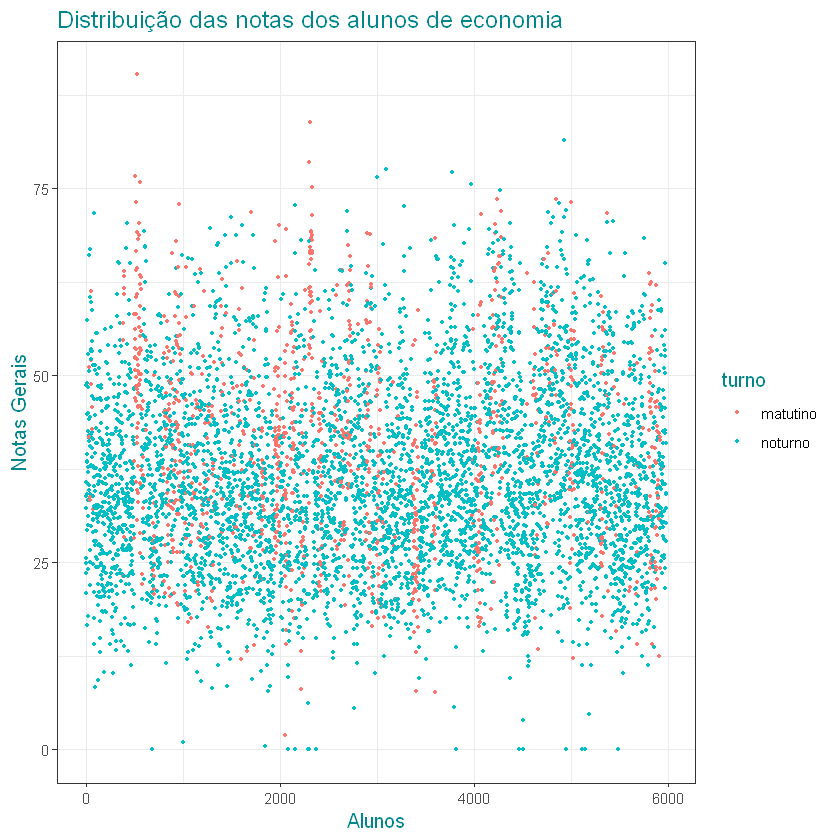

In [20]:
ggplot(data=df, aes(x=id, y=nota_geral))+
    geom_point(aes(color=turno), size=0.8)+
    ggtitle("Distribuição das notas dos alunos de economia")+
    labs(x="Alunos", y="Notas Gerais")+
    theme_bw()+
    theme(title=element_text(size=12,color="turquoise4"))


# Distribuição dos dados dos alunos do Matutino e Noturno por categoria:

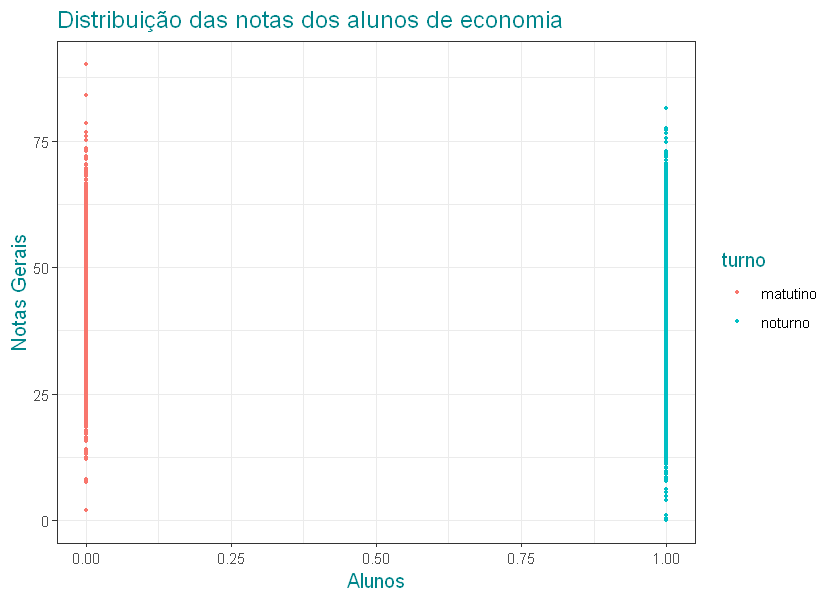

In [21]:
options(repr.plot.width = 7, repr.plot.height = 5)
ggplot(data=df, aes(y=nota_geral, x=turno_bi))+
    geom_point(aes(color=turno), size=0.8)+
    ggtitle("Distribuição das notas dos alunos de economia")+
    labs(x="Alunos", y="Notas Gerais")+
    theme_bw()+
    theme(title=element_text(size=12,color="turquoise4"))

# Boxplot
* Aqui podemos confirmar a hipótese abstraída do gráfico anterior: verificamos que o desempenho médio do turno matutino é superior ao do noturno.
* O matutino possui uma maior variabilidade das notas em relação ao noturno.
* As distribuições são aproximadamente simétricas, pois a média esta muito próxima da mediana.
> Conclusões: a) a turma matutino foi mais eficiênte; b) as distribuições podem ser normais.

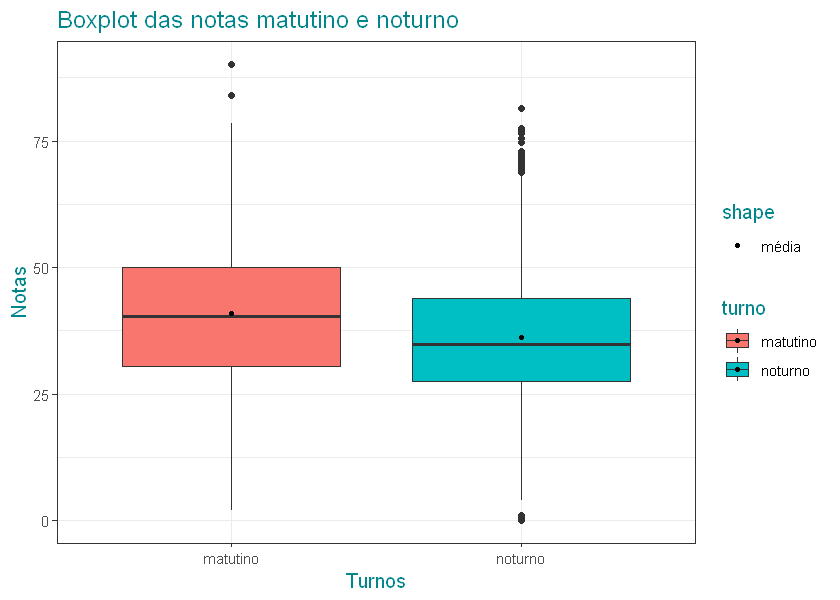

In [22]:
options(repr.plot.width = 7, repr.plot.height = 5)
ggplot(df, aes(x=turno, y=nota_geral, fill=turno)) +
    geom_boxplot() +
    stat_summary(aes(shape = "média"),
               geom = "point",
               fun = mean,
               size = 1)+
    ggtitle("Boxplot das notas matutino e noturno") +
    theme_bw()+
    theme(title=element_text(size=12,color="turquoise4"))+
    xlab("Turnos")+
    ylab("Notas")

# Métricas das variáveis:
* As métricas confirmam o pressuposto: o desempenho médio do matutino foi mais eficiênte em todos as métricas sendo a média do matutino superior em 4.76 pontos.
* A variabilidade do desempenho superior do matutino pode ser verificado com o desvio padrão levemente superior.

In [23]:
print('=========== Quartis + Mediana + Média + Máxim/Mínimo ============')
print('Métricas das notas do turno noturno:')
summary(df[df$turno=='noturno',3])
print(('Métricas das notas do turno matutino:'))
summary(df[df$turno=='matutino',3])
print('=========== Variância ===============')
print(paste0('Variância das notas do turno noturno: ', round(var(df[df$turno=='noturno',3]),2)))
print(paste0('Variância das notas do turno matutino: ',round (var(df[df$turno=='matutino',3]),2)))
print('=========== Desvio Padrão ============')
print(paste0('Desvio Padrão das notas do turno noturno: ', round(sd(df[df$turno=='noturno',3]),2)))
print(paste0('Desvio Padrão notas do turno matutino: ',round (sd(df[df$turno=='matutino',3]),2)))

[1] "=========== Quartis + Mediana + Média + Máxim/Mínimo ============"
[1] "Métricas das notas do turno noturno:"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   27.40   34.85   36.10   43.90   81.50 

[1] "Métricas das notas do turno matutino:"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.90   30.45   40.40   40.89   49.95   90.20 

[1] "=========== Variância ==============="
[1] "Variância das notas do turno noturno: 151.57"
[1] "Variância das notas do turno matutino: 180.05"
[1] "=========== Desvio Padrão ============"
[1] "Desvio Padrão das notas do turno noturno: 12.31"
[1] "Desvio Padrão notas do turno matutino: 13.42"


# Análise das médias
* Permite constatar a diferença das médias entre as turmas

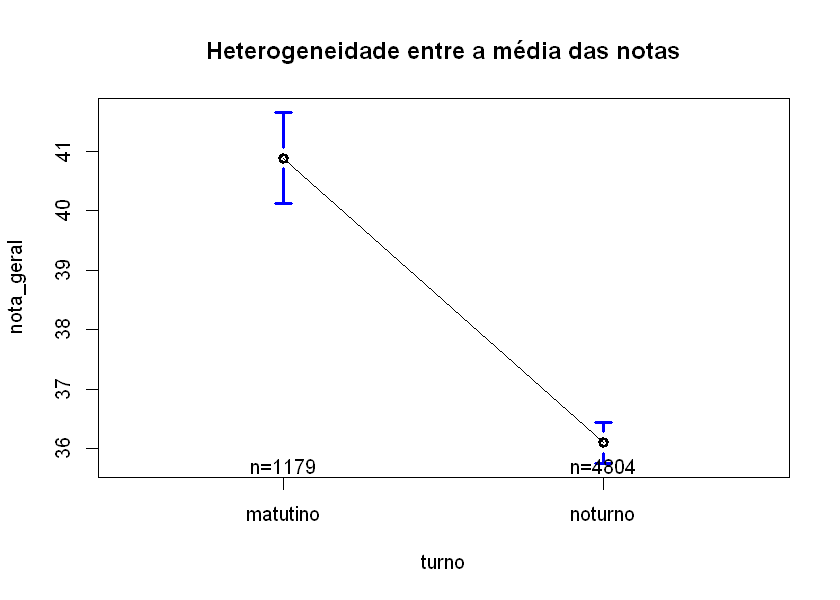

In [24]:
plotmeans(nota_geral~turno, data=df, barwidth=3,main="Heterogeneidade entre a média das notas")

# Normalidade
* Para decidir qual teste de hipótese realizar, para confirmar se existe diferença significativa entre o desempenho, vamos verificar a normalidade das distribuições
* Verificamos pelo gráfico e confirmamos pelo teste de normalidade que se tratam de distribuições normais.

[1] "Métricas das notas do turno noturno:"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   27.40   34.85   36.10   43.90   81.50 

[1] "Métricas das notas do turno matutino:"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.90   30.45   40.40   40.89   49.95   90.20 

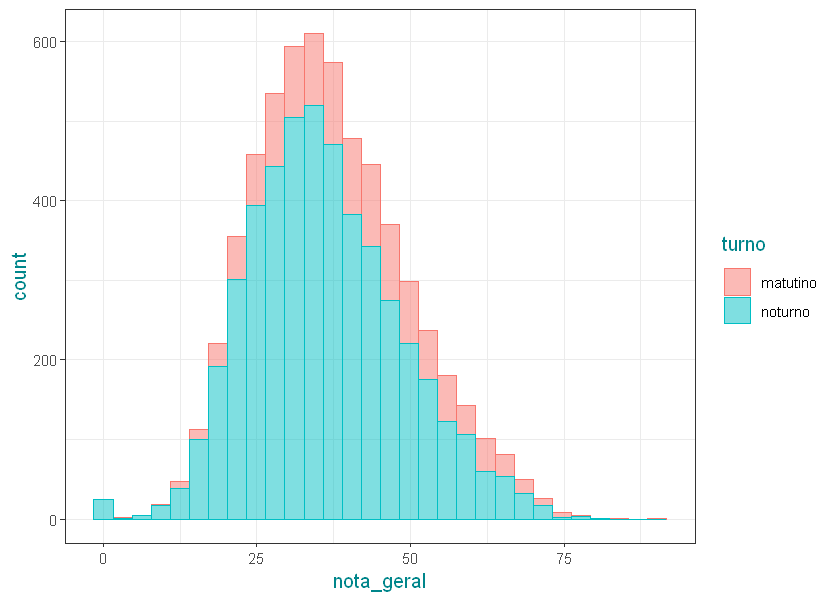

In [25]:
ggplot(df, aes(x=nota_geral, color=turno, fill=turno)) +
    geom_histogram(alpha=0.5, bins = 30)+
    theme_bw()+
    theme(title=element_text(size=12,color="turquoise4"))
print('Métricas das notas do turno noturno:')
summary(df[df$turno=='noturno',3])
print(('Métricas das notas do turno matutino:'))
summary(df[df$turno=='matutino',3])

# Teste de Normalidade:
* Confirma que ambas as distribuições são normais

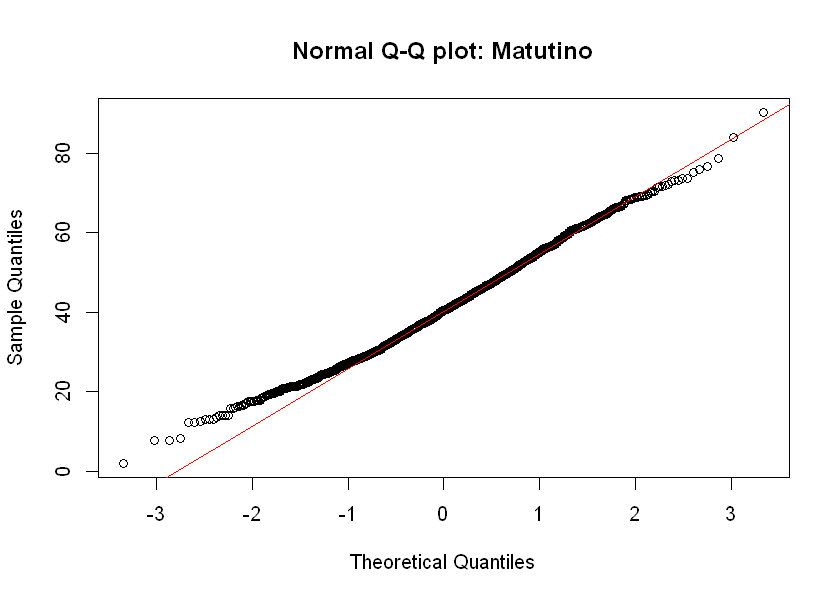

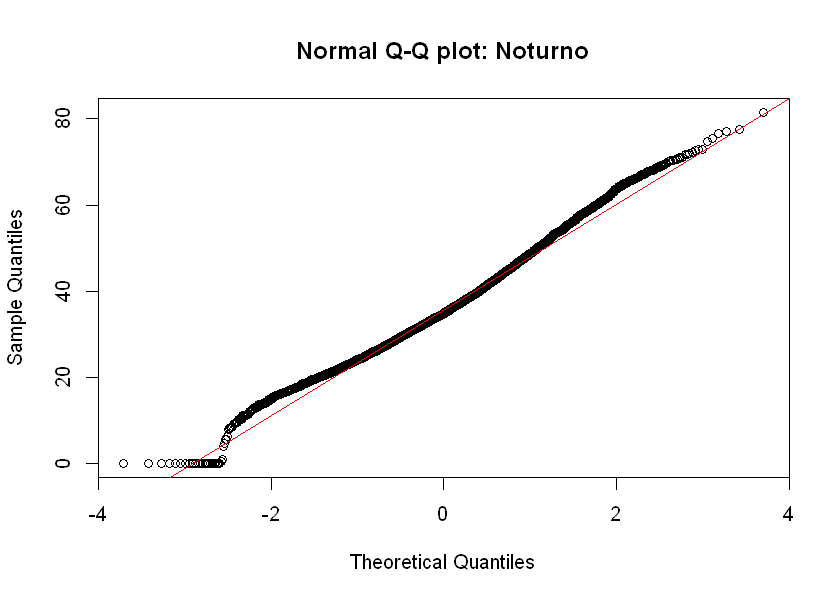

In [26]:
noturno = df[df$turno=='noturno',3]
matutino = df[df$turno=='matutino',3]
qqnorm(matutino, main = "Normal Q-Q plot: Matutino")
qqline(matutino, col=2)
qqnorm(noturno, main = "Normal Q-Q plot: Noturno")
qqline(noturno, col=2)

# Teste de Hipótese
* Hipótese Nula H0 = Não há diferença nas médias -> Matutino = Média Noturno
* Hipótese Alternativa  H1 = Há diferença entre as médias das turmas Médias -> Matutino != Média Noturno
* *alfa*: Nível de significância = 0.05 -> 95% de certeza
* p-value >= *alfa* -> não rejeita H0 (não há evidências)
* p-value < *alfa* -> rejeita H0 (há evidências)
---

## T de Student:
> O teste mais indicado para comparar as médias entre duas amostra com distribuição normal é o teste de Student. Ele permitirá saber se a diferença entre as médias é significativa.

In [27]:
print(paste0('Média do turno noturno: ', round(mean(noturno),2)))
print(paste0('Média do matutino: ', round(mean(matutino),2)))
print(paste0('Média total: ', round(mean(df$nota_geral),2)))
print(paste0('Variância das notas do turno noturno: ',round(var(noturno),2)))
print(paste0('Variância das notas do turno matutino: ',round(var(matutino),2)))
print(paste0('Variância total: ', round(var(df$nota_geral),2)))

[1] "Média do turno noturno: 36.1"
[1] "Média do matutino: 40.89"
[1] "Média total: 37.05"
[1] "Variância das notas do turno noturno: 151.57"
[1] "Variância das notas do turno matutino: 180.05"
[1] "Variância total: 160.78"


In [28]:
t.test(noturno, matutino)


	Welch Two Sample t-test

data:  noturno and matutino
t = -11.155, df = 1697.2, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.63050 -3.94662
sample estimates:
mean of x mean of y 
 36.10169  40.89025 


## p-value (2.2e-16) < *alfa* (0.05) -> Rejeita-se a hipótese nula.
* Conclusão: Há evidencias significativas de que as médias são diferentes.

# Regressão Linear Simples


* Tentativa de montagem e interpretação da regressão linear simples com o R, onde:
> nota_geral = noturno.b + e

In [29]:
head(df)

,id,turno,nota_geral,turno_bi
161,1,noturno,24.9,1
162,2,noturno,25.6,1
163,3,noturno,48.7,1
164,4,noturno,35.7,1
165,5,noturno,33.9,1
166,6,noturno,23.5,1


## Verificação dos tipos

In [30]:
str(df)
str(noturno)

'data.frame':	5983 obs. of  4 variables:
 $ id        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ turno     : Factor w/ 2 levels "matutino","noturno": 2 2 2 2 2 2 2 2 2 2 ...
 $ nota_geral: num  24.9 25.6 48.7 35.7 33.9 23.5 32.2 20.9 48.9 39.4 ...
 $ turno_bi  : num  1 1 1 1 1 1 1 1 1 1 ...
 num [1:4804] 24.9 25.6 48.7 35.7 33.9 23.5 32.2 20.9 48.9 39.4 ...


# Verificando os pressupostos:
## Relação linear

### Não há linearidade entre alunos e notas

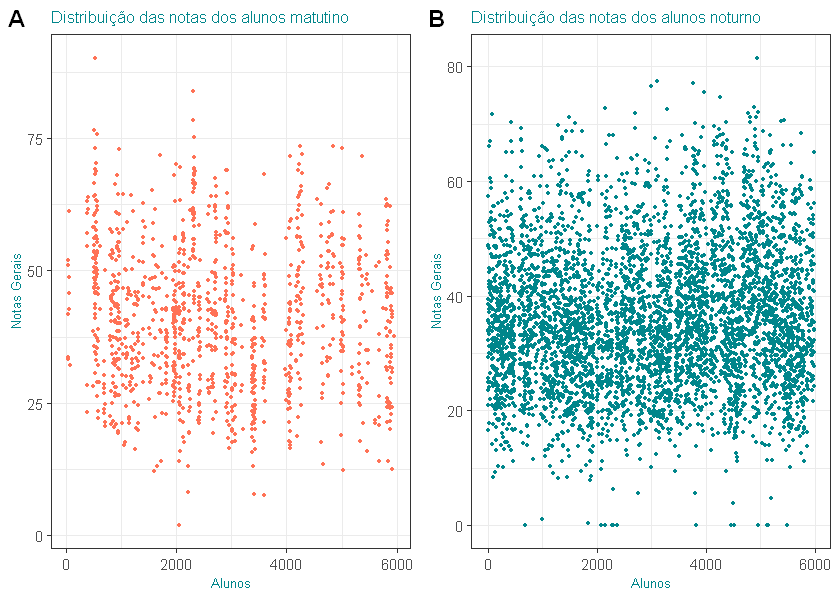

In [31]:
plot2 = ggplot(data=df[df$turno=='noturno',], aes(x=id, y=nota_geral))+
            geom_point(color="turquoise4", size=0.8)+
            ggtitle("Distribuição das notas dos alunos noturno")+
            labs(x="Alunos", y="Notas Gerais")+
            theme_bw()+
            theme(title=element_text(size=8,color="turquoise4"))
plot1 = ggplot(data=df[df$turno=='matutino',], aes(x=id, y=nota_geral))+
            geom_point(color="coral1",size=0.8)+
            ggtitle("Distribuição das notas dos alunos matutino")+
            labs(x="Alunos", y="Notas Gerais")+
            theme_bw()+
            theme(title=element_text(size=8,color="turquoise4"))
plot_grid(plot1, plot2, labels = "AUTO")

## A relação deve se basear entre as notas e o turno:
* 0 -> matutino
* 1 -> noturno

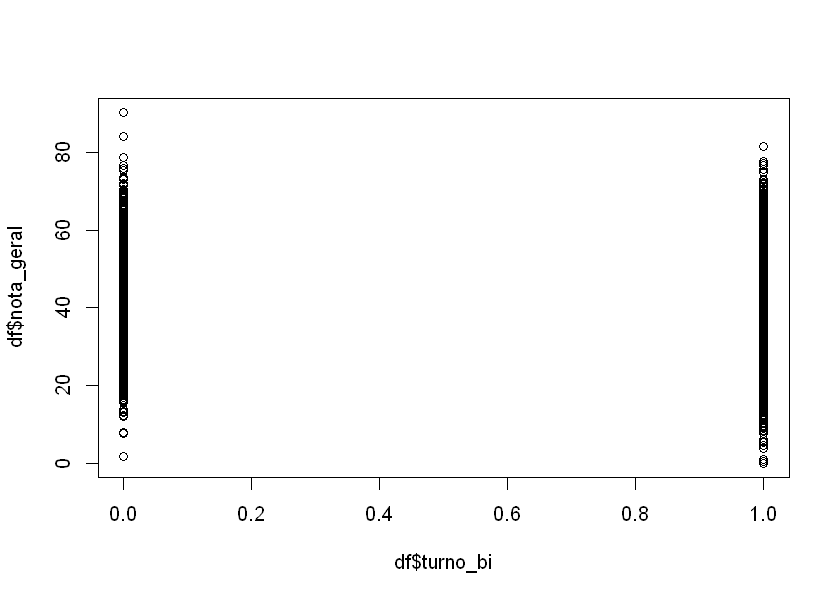

In [32]:
plot(df$turno_bi, df$nota_geral)

# Construção do modelo 1

## Neste modelo os dados ficaram agrupados nos diferentes níveis das variáveis categóricas.
---

In [33]:
mod = lm(nota_geral ~ turno_bi, df)
mod


Call:
lm(formula = nota_geral ~ turno_bi, data = df)

Coefficients:
(Intercept)     turno_bi  
     40.890       -4.789  


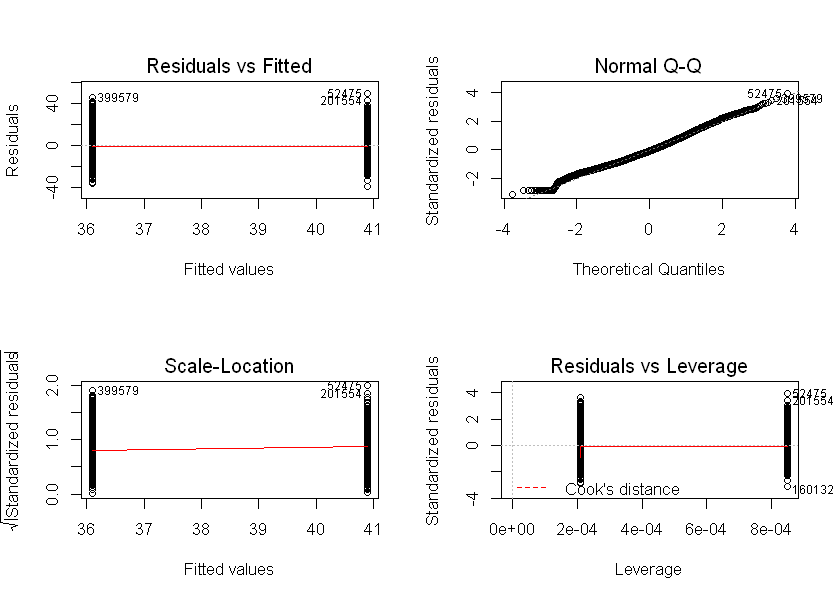

In [34]:
par(mfrow=c(2,2))
plot(mod)

In [35]:
summary(mod)


Call:
lm(formula = nota_geral ~ turno_bi, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.990  -9.002  -1.102   8.098  49.310 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  40.8902     0.3651  111.99   <2e-16 ***
turno_bi     -4.7886     0.4075  -11.75   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.54 on 5981 degrees of freedom
Multiple R-squared:  0.02257,	Adjusted R-squared:  0.02241 
F-statistic: 138.1 on 1 and 5981 DF,  p-value: < 2.2e-16


# Interpretação do modelo:
* A reta intercepta o eixo y em aproximadamente: 40.9
* O valor de p foi menor que 5% de modo que o turno tem impacto na média geral dos alunos
* O coeficiente negativo significa que a diferênça de turno leva a uma queda de aproximadamente -4.8 na média geral do aluno.
* De acordo com o R^2 o turno do aluno explica 2% da nota geral.

# Esquema gráfico do modelo e equação da reta:
---

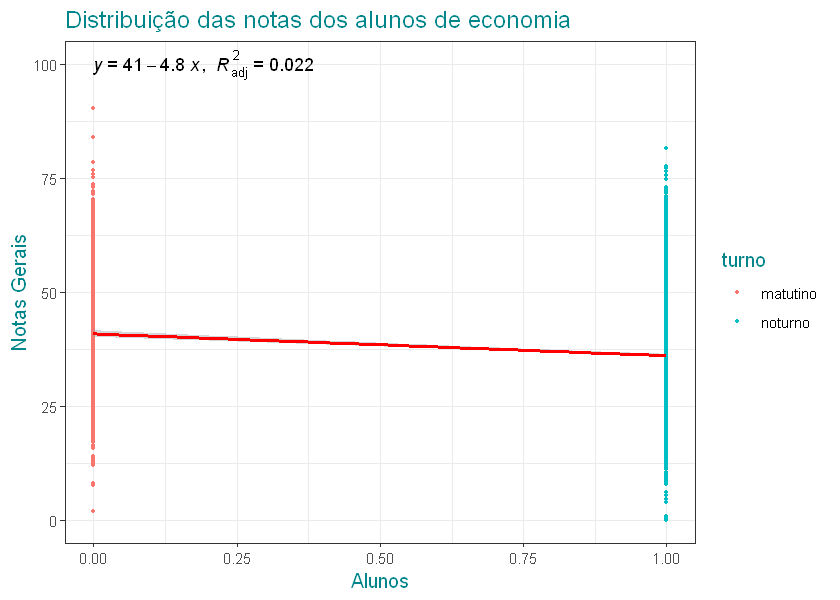

In [36]:
ggplot(data=df, aes(y=nota_geral, x=turno_bi))+
    geom_point(aes(color=turno), size=0.8)+
    geom_smooth(method="lm", formula= y ~ x, col="red")+
    stat_regline_equation(aes(label = paste(..eq.label.., ..adj.rr.label.., sep="*plain(\",\")~~")), label.x = 0, label.y = 100)+
    ggtitle("Distribuição das notas dos alunos de economia")+
    labs(x="Alunos", y="Notas Gerais")+
    theme_bw()+
    theme(title=element_text(size=12,color="turquoise4"))


---
### Fim